# Value Iteration & Policy Iteration

On va utiliser l'exemple du monde grille simple. 

![Grid World](https://www.lamsade.dauphine.fr/~airiau/Teaching/M2-IASDapp-RL/gridworld.png)



On va numéroter les états comme suit:

| 7 | 8 | 9 | 10 |
|---|---|----|---|
| **4** |  - | **5** | **6**  |
| **0** | **1** | **2** | **3**  |

Les états finaux sont donc les états 6 et 10.

On a 4 actions disponibles, on les encode de la façon suivante:
* $\uparrow$: 0 
* $\leftarrow$ : 1
* $\downarrow$: 2
* $\rightarrow$ : 3

Ci-dessous, on a entré pour vous la matrice de transition $T$ et la matrice de récompense $R$. Ainsi $T[s_1,a,s_2]$ donne la probabilité d'atteindre l'état $s_2$ en ayant pris l'action $a$ dans l'état $s_1$ et $R[s,a]$ donne la récompense immédiate reçue après avoir pris l'action $a$ dans l'état $s$.

Vous pouvez facilement changer la pénalité pour avancer d'une case en changeant la valeur de la variable `penalty` ci-dessous.

Ce n'est peut-être pas la manière la plus élégante, mais cela suffira pour l'exercice!



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


l=0.8
s = 0.1
v_win = 1
v_lose = -1

T = np.zeros((11, 4, 11))
#UP
T[0,0,:]=[s, s, 0, 0, l, 0, 0, 0, 0, 0, 0 ] 
T[1,0,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,0,:]=[0, s, 0, s, 0, l, 0, 0, 0, 0, 0 ]
T[3,0,:]=[0, 0, s, s, 0, 0, l, 0, 0, 0, 0 ]
T[4,0,:]=[0, 0, 0, 0, 2*s, 0, 0, l, 0, 0, 0 ]
T[5,0,:]=[0, 0, 0, 0, 0, s, s, 0, 0, l, 0 ]
T[6,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,0,:]=[0, 0, 0, 0, 0, 0, 0, s+l, s, 0, 0 ]
T[8,0,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,0,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#LEFT
T[0,1,:]=[s+l, 0, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,1,:]=[l, 2*s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,1,:]=[0, l, s, 0, 0, s, 0, 0, 0, 0, 0 ]
T[3,1,:]=[0, 0, l, s, 0, 0, s, 0, 0, 0, 0 ]
T[4,1,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,1,:]=[0, 0, s, 0, 0, l, 0, 0, 0, s, 0 ]
T[6,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,1,:]=[0, 0, 0, 0, s, 0, 0, s+l, 0, 0, 0 ]
T[8,1,:]=[0, 0, 0, 0, 0, 0, 0, l, 2*s, 0, 0 ]
T[9,1,:]=[0, 0, 0, 0, 0, s, 0, 0, l, s, 0 ]
T[10,1,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
# DOWN
T[0,2,:]=[s+l, s, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] 
T[1,2,:]=[s, l, s, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,2,:]=[0, s, l, s, 0, 0, 0, 0, 0, 0, 0 ]
T[3,2,:]=[0, 0, s, l+s, 0, 0, 0, 0, 0, 0, 0 ]
T[4,2,:]=[l, 0, 0, 0, 2*s, 0, 0, 0, 0, 0, 0 ]
T[5,2,:]=[0, 0, l, 0, 0, s, s, 0, 0, 0, 0 ]
T[6,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,2,:]=[0, 0, 0, 0, l, 0, 0, s, s, 0, 0 ]
T[8,2,:]=[0, 0, 0, 0, 0, 0, 0, s, l, s, 0 ]
T[9,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, s, l, s ]
T[10,2,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]
#RIGHT
T[0,3,:]=[s, l, 0, 0, s, 0, 0, 0, 0, 0, 0 ] 
T[1,3,:]=[0, 2*s, l, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[2,3,:]=[0, 0, s, l, 0, s, 0, 0, 0, 0, 0 ]
T[3,3,:]=[0, 0, 0, s+l, 0, 0, s, 0, 0, 0, 0 ]
T[4,3,:]=[s, 0, 0, 0, l, 0, 0, s, 0, 0, 0 ]
T[5,3,:]=[0, 0, s, 0, 0, 0, l, 0, 0, s, 0 ]
T[6,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
T[7,3,:]=[0, 0, 0, 0, s, 0, 0, s, l, 0, 0 ]
T[8,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 2*s, l, 0 ]
T[9,3,:]=[0, 0, 0, 0, 0, s, 0, 0, 0, s, l ]
T[10,3,:]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ]

penalty= 0.00;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose



# plot the best policy given the value function v:
# i.e. plot the best action for each state given the value function v.

def plotBestPolicy(v, gamma):
  bestV=np.zeros(11)
  bestA=np.zeros(11)
  fig, ax = plt.subplots()
  # policy extraction
  for s1 in range(11):
    val=[]
    for a in range(4):
      va=0
      for s2 in range(11):
        va += T[s1,a,s2]*v[s2]
      val= val+[ R[s1,a]+gamma*va ]
    bestV[s1]=np.max(val)
    bestA[s1]=np.argmax(val)

    matV= np.array( [[bestV[7], bestV[8], bestV[9], bestV[10]],
                    [bestV[4],   -1 , bestV[5], bestV[6]],
                    [bestV[0], bestV[1], bestV[2], bestV[3]]]
                    )
    matA = np.array([
                    [bestA[7], bestA[8], bestA[9], -1],
                    [bestA[4],   -1 , bestA[5], -1],
                    [bestA[0], bestA[1], bestA[2], bestA[3]]])

    im = ax.imshow(matV)


  for i in range(matV.shape[0]):
      for j in range(matV.shape[1]):
          if matA[i][j]==-1:
              arrow = ''
          elif matA[i, j] == 0:
              arrow = '^'
          elif matA[i, j] == 1:
              arrow = '<'
          elif matA[i, j] == 2:
              arrow = 'v'
          elif matA[i, j] == 3:
              arrow = '>'
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

## Value Iteration
Implémentez l'algorithme d'itération sur les valeurs. Pour ce faire, implémentez une fonction qui prend en paramètre:
* $\epsilon$ le paramètre pour le test d'arrêt (dans un premier temps, vous pouvez remplacer ce paramètre par un nombre d'itérations maximal, comme dans l'appel ci-dessou)
* $\gamma$ le taux d'escompte (i.e. la valeur à l'instant t d'obtenir une unité de récompense à l'instant t+1)
* $T$ la matrice de transition
* $R$ la matrice de récompense

La méthode retourne le vecteur $v: S \rightarrow {\mathbb R}$ qui associe à chaque état la valeur optimale de cet état.

La fonction $printV$ ci-dessous affichera les valeurs de $v$ pour le problème du gridworld.

Vous pourrez ainsi tester si vous retrouvez les valeurs de l'exemple montré en cours. 

In [ ]:

# Value iteration sans convergence
def value_iteration(step, gamma, T, R):
    n_actions = 4
    n_states = 11
    v_states = []
    for s in range(n_states):
        v_states.append(0)   # on initialise le vecteur value state avec des très petites valeurs (bruit)

    for step in range(step):
        if step % 10 == 0:

            print("iteration:", step)
        for s in range(n_states):
            if s == 6:
                v_states[s] = -1 # Il s'agit de la case fin negative -1
            elif s == 10:
                v_states[s] = 1 # Il s'agit de la case fin positive +1
            else:
                for a in range(n_actions):
                    curr_val = 0
                    for s_prim in range(n_states): 
                        curr_val += T[s][a][s_prim] * v_states[s_prim]
                    curr_val *= gamma
                    curr_val += R[s][a]
                    v_states[s] = max(v_states[s], curr_val)

    return v_states



In [ ]:
# Value iteration avec convergence
def value_iteration_convergence(epsilon, gamma, T, R):
    n_actions = 4
    n_states = 11
    iter = 0
    v_states = []
    for s in range(n_states):
        v_states.append(0)   # on initialise le vecteur value state avec des très petites valeurs (bruit)

    while True:
        iter += 1
        delta = 0
        print("iteration:", iter)
        for s in range(n_states): 
            prev_v = v_states[s]
            if s == 6:
                v_states[s] = -1 # Il s'agit de la case fin negative -1
            elif s == 10:
                v_states[s] = 1 # Il s'agit de la case fin positive +1
            else:
                for a in range(n_actions):
                    curr_val = 0
                    for s_prim in range(n_states): 
                        curr_val += T[s][a][s_prim] * v_states[s_prim]
                    curr_val *= gamma
                    curr_val += R[s][a]
                    v_states[s] = max(v_states[s], curr_val)

            # condition de convergence
            delta = max(delta, np.abs(v_states[s] - prev_v))
            
        # Check la convergence
        if delta < epsilon:
           break
    return v_states


In [ ]:

def printV(v):
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[7], v[8], v[9], v[10]))
  print('| {:03.2f} | ---- | {:03.2f} | {:03.1f} |'.format(v[4], v[5], v[6]))
  print('| {:03.2f} | {:03.2f} | {:03.2f} | {:03.2f} |'.format(v[0], v[1], v[2], v[3]))
  

In [ ]:
# Mes résultats
step = 100
gamma = 0.9
v_states = value_iteration(step, gamma, T, R)
printV(v_states)

iteration: 0
iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50
iteration: 60
iteration: 70
iteration: 80
iteration: 90
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


In [ ]:
# Mes résultats
epsilon = 1e-9
gamma = 0.9
v_states_convergence = value_iteration_convergence(epsilon, gamma, T, R)
printV(v_states_convergence)

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
| 0.64 | 0.74 | 0.85 | 1.00 |
| 0.57 | ---- | 0.57 | -1.0 |
| 0.49 | 0.43 | 0.48 | 0.28 |


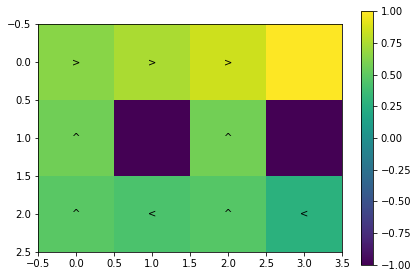

In [ ]:
plotBestPolicy(v_states, 0.9)

Vous pouvez modifier la matrice de récompenses pour observer les différentes politiques optimales vues en cours. Peut-être en avons nous oublié?


| 0.51 | 0.65 | 0.80 | 1.00 |
| 0.40 | ---- | 0.49 | -1.0 |
| 0.30 | 0.25 | 0.34 | 0.13 |




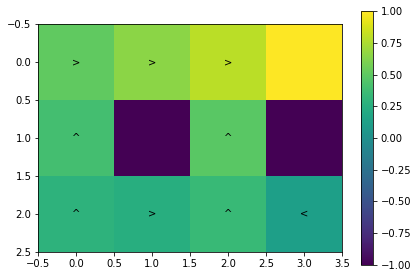

In [ ]:
# Avec une pénalité de -0.05
penalty= -0.04;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose


# Mes résultats
step = 100
gamma = 0.9
v_states = value_iteration(step, gamma, T, R)
printV(v_states)
print("\n")

plotBestPolicy(v_states, 0.9)

| 0.00 | 0.00 | 0.35 | 1.00 |
| 0.00 | ---- | 0.00 | -1.0 |
| 0.00 | 0.00 | 0.00 | 0.00 |




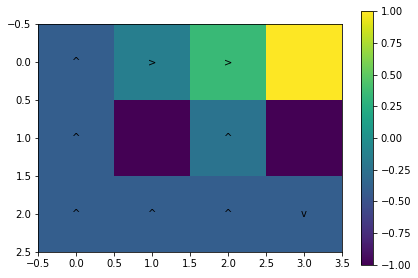

In [ ]:
# Avec une pénalité de -0.5
penalty= -0.4;
R = penalty*np.ones((11,4))
R[10,:]= np.ones(4)*v_win
R[6,:]= np.ones(4)*v_lose


# Mes résultats
step = 100
gamma = 0.9
v_states = value_iteration(step, gamma, T, R)
printV(v_states)
print("\n")

plotBestPolicy(v_states, 0.9)

## Policy Iteration

Implémentez l'algorithme d'itération sur les politiques. Pour débugger, vous pouvez dessiner la politique avec les fonctions ci-dessus (pour voir la fonction de valeur et/ou la politique associée).


**Notes:**

L'algorithme d'itération de politiques est constitué de deux parties:
* l'évaluation de politique => calcule les valeurs pour chaque état v(pi)
* l'amélioration de politique => Améliore la politique pi

Pseudo Code:

Choose Pi_0 and set i = 0

repeat
* for each state s in S
** v(pi(i))[s]
* for each state s in S
** compute pi(i+1)[s]
* i += 1

until Pi converges

In [ ]:

def policy_evaluation(policy, S):
    v = {s: 0 for s in range(S)}

    while True:
        oldV = v.copy()

        for s in range(S):
            a = policy[s]
            v[s] = R[s][a] + sum(T[s][a][s_prim] * oldV[s_prim] for s_prim in range(S))

        # convergence: si l'etat t-1 = etat t, alors convergence
        if all(oldV[s] == v[s] for s in range(S)):
            break

    return v


def policy_improvment(V, S, A):
    print(A)
    policy = {s: A[0] for s in range(S)}

    for s in range(S):
        Q = {}
        for a in A:
            Q[a] = R[s][a] + sum(T[s][a][s_prim] * V[s_prim] for s_prim in range(S))
        policy[s] = max(Q, key=Q.get)
    return policy


# Fonction principale
def policy_iteration(T, R):
    n_states = 11
    n_actions = 4
    iter = 0
    A = [0, 1, 2, 3]

    # Initialise v et pi
    policy_pi = {s: A[0] for s in range(n_states)} # on initialise une politique arbitraire

    print("Initial policy:", policy_pi)

    while True:
        old_policy = policy_pi.copy()
        iter += 1

        # Etape 1: politique d'évaluation
        v_states = policy_evaluation(policy_pi, n_states)

        # Etape 2: politique d'amélioration
        policy = policy_improvment(v_states, n_states, A)

        if all(old_policy[s] == policy_pi[s] for s in range(n_states)):
            break
    
    return policy, v_states


In [ ]:
optimal_policy, v = policy_iteration(T, R)
print(optimal_policy)

Initial policy: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
[0, 1, 2, 3]
{0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 3, 8: 3, 9: 0, 10: 0}


In [ ]:
v

{0: 0.9776536312849138,
 1: 0.7988826815642441,
 2: 0.6201117318435744,
 3: -0.819987585350714,
 4: 0.9999999999999974,
 5: 0.7777777777777767,
 6: -1.0,
 7: 0.9999999999999973,
 8: 0.9999999999999981,
 9: 0.9999999999999988,
 10: 1.0}

| 1.00 | 1.00 | 1.00 | 1.00 |
| 1.00 | ---- | 0.78 | -1.0 |
| 0.98 | 0.80 | 0.62 | -0.82 |




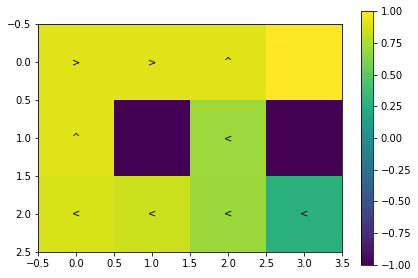

In [ ]:
printV(v)
print("\n")

plotBestPolicy(v, 0.9)

Conclusion:
C'est super opti!